In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import random

In [5]:
df=pd.read_csv(r'C:\Users\mayan\handson-ml\datasets\housing\housing.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [131]:
total_bedrooms=len(df['total_bedrooms'])
missing_bedrooms=df['total_bedrooms'].isna().sum()

In [42]:
# plt.hist()
# plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs

In [74]:
index=[]
for i in range(len(df['total_bedrooms'].isna())):
    if(df['total_bedrooms'].isna()[i]==False):
        index.append(i)

In [86]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [139]:
df['total_bedrooms'].mean()

537.8705525375618

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <a list of 10 Patch objects>)

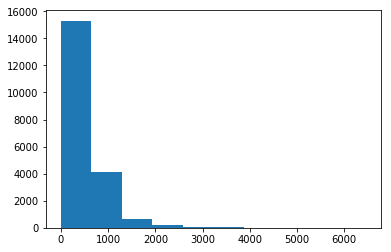

In [135]:
plt.hist(df['total_bedrooms'])

In [160]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [161]:
df['total_bedrooms'].isna().sum()

0

In [164]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [165]:
df["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

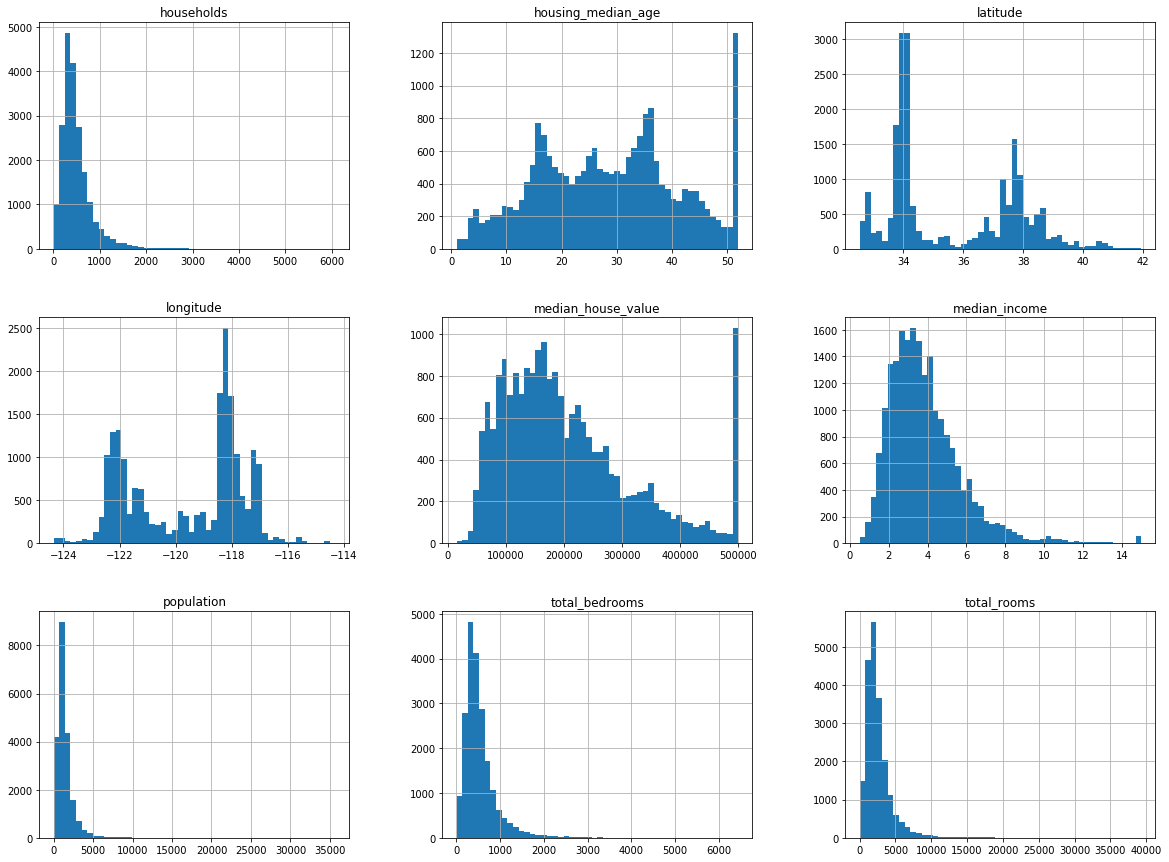

In [167]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [195]:
def split_train_test(data, test_ratio):
    np.random.seed(1234)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [196]:
X_train,X_test=split_train_test(df,0.80)

In [194]:
X_train[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12343,-116.52,33.85,13.0,7559.0,1444.0,3189.0,1105.0,3.4886,112500.0,INLAND
14933,-117.04,32.65,8.0,8806.0,1401.0,3159.0,1059.0,4.2155,247800.0,NEAR OCEAN
13267,-117.67,34.09,17.0,4418.0,1256.0,2417.0,1094.0,2.7266,101000.0,INLAND
18748,-122.31,40.49,18.0,4026.0,718.0,1731.0,705.0,3.3500,118400.0,INLAND
2972,-119.08,35.34,16.0,1535.0,238.0,768.0,236.0,5.4449,118500.0,INLAND
9046,-118.10,34.65,33.0,873.0,177.0,425.0,142.0,2.6700,187500.0,INLAND
12118,-117.14,33.94,5.0,4873.0,639.0,1947.0,568.0,6.3223,223200.0,INLAND
15231,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0,NEAR OCEAN
6942,-118.08,33.98,36.0,1492.0,282.0,1041.0,270.0,4.0677,165800.0,<1H OCEAN
1189,-121.52,39.43,15.0,2119.0,389.0,1079.0,374.0,2.3566,80400.0,INLAND
